In [1]:
import pyGlacier as pg
import matplotlib.pyplot as plt
import numpy as np

Firs, let us set up a simple solver using the shallow ice approximation with no sliding.

We will then compare it to the analytical 1D solution by Buler et al ("Exact time-depentent similarity solutions for isothermal shallow ice sheets")

First, we create a function that returns the analytical solution for a given position r, the combination of rheology parameters gamma, and time.

In [2]:
def halfar(t,r,gamma): # Returns the analytical solution at a given time
    H1 = 5e4
    n = 3.0
    alpha = 1.0/11.0
    lmbd = ((n+2)*alpha/gamma)**(1.0/n)*(2.0*n+1.0)/(n+1.0)
    theta = H1**((2.0*n+1.0)/(n+1.0))*lmbd**(-n/(n+1.0))
    H = np.zeros(np.size(r))
    H[np.where(abs(r)<=theta*t**(alpha))] = t**(-alpha)*(H1**((2.0*n+1.0)/n) - lmbd*(t**(-alpha)*abs(r[np.where(abs(r)<=theta*t**(alpha))]))**((n+1.0)/n))**(n/(2.0*n+1.0))
    return H

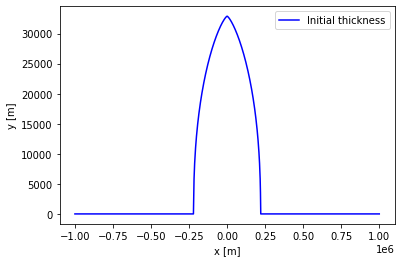

In [3]:
A = 1e-24 
rho = 900.0 #Ice density
g = 9.8
n = 3.0
x = np.linspace(-1e6,1e6,1000)
dx = x[1]-x[0]
b = np.zeros(np.size(x))
gamma = A*2.0*(rho*g)**n
t0 = 100
H_analytical = halfar(t0,x,gamma)

# Plot initial state (halfar solution)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,H_analytical, 'b-', label='Initial thickness')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
ax.legend()
plt.show()

Set up variable structure as a dictionary

In [4]:
def SMB(model):
    return 0*model.b

variables = {
'solver': 
    {'ID': 'SIA', # Choose the SIA solver
    'variables':{
        'rho': rho, # ice density
        'g': g, # gravitational acceleration
        'n': n, #Glen's expionent
        't': t0, # initial time (s)
        'A': A, # Rheology constant
        'H': H_analytical, # Initial ice thickness set to the analytical solution at t0
        'b': b, # topography
        'dx': dx, # Spatial resolution
        'SMB': SMB} # Surface mass balance (set to 0)
    },
'DrainageSystem': # No drainage system
    {'ID': 'None'},
'FrictionLaw': #No sliding
    {'ID': 'None'},
'Output': # No output
    {'ID': 'None'}
}

# Create glacier object and run simulation
glacier = pg.Flowline(variables = variables)
glacier.run(t_max = 3.15e7, dt = 1e2) # run for 1 year with time step 100s

********** INITIALIZING FLOWLINE **********
Solver: SIA
FrictionLaw: None
DrainageSystem: None
*******************************************
********** RUN **********
t max: 0.9981747661419119 years
dt:100.0 s
**************************
0.03993015945445788 years, dt = 100.0s
0.07985715010013436 years, dt = 100.0s
0.11978414074581084 years, dt = 100.0s
0.15971113139148732 years, dt = 100.0s
0.1996381220371638 years, dt = 100.0s
0.23956511268284025 years, dt = 100.0s
0.27949210332851676 years, dt = 100.0s
0.3194190939741932 years, dt = 100.0s
0.3593460846198697 years, dt = 100.0s
0.3992730752655462 years, dt = 100.0s
0.4392000659112226 years, dt = 100.0s
0.47912705655689913 years, dt = 100.0s
0.5190540472025756 years, dt = 100.0s
0.558981037848252 years, dt = 100.0s
0.5989080284939285 years, dt = 100.0s
0.638835019139605 years, dt = 100.0s
0.6787620097852816 years, dt = 100.0s
0.718689000430958 years, dt = 100.0s
0.7586159910766345 years, dt = 100.0s
0.798542981722311 years, dt = 100.0s
0.

0

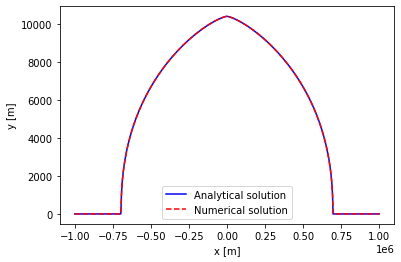

In [5]:
# Plot analytical and numerical solution
fig = plt.figure()
ax = fig.add_subplot(111)
H_analytical = halfar(glacier.t,x,gamma) # Analytical solution
ax.plot(x,H_analytical, 'b-', label='Analytical solution')
ax.plot(x,glacier.H, 'r--', label='Numerical solution')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
ax.legend()
plt.show()

It is also possible to add an interesting topography, as well as a non-zero surface mass balance term. Let's set up a new glacier with the same variables as before, but with a new topography and a new surface mass balance:

In [ ]:
x = np.linspace(0,2e4,1000)
dx = x[1]-x[0]

tmp = np.exp(-(x-10000)**2/1e2**2); tmp = tmp/np.sum(tmp)

b = np.convolve(2000*np.exp(-(x-10000)**2/5e3**2) + 500*np.random.rand(np.size(x)), tmp, mode='same')-500

def SMB(model):
    return (model.b+model.H-1000.0)*1e-3/(3.15e7)*5

variables = {
'solver': 
    {'ID': 'SIA', # Choose the SIA solver
    'variables':{
        'rho': rho, # ice density
        'g': g, # gravitational acceleration
        'n': n, #Glen's expionent
        't': t0, # initial time (s)
        'A': A, # Rheology constant
        'H': b*0, # Initial ice thickness is zero
        'b': b, # topography
        'dx': dx, # Spatial resolution
        'SMB': SMB} # Surface mass balance (set to 0)
    },
'DrainageSystem': # No drainage system
    {'ID': 'None'},
'FrictionLaw': #No sliding
    {'ID': 'None'},
'Output': # No output
    {'ID': 'None'}
}

# Create glacier object and run simulation
glacier = pg.Flowline(variables = variables)
fig = plt.figure(figsize=(20,5))
for i in range(10):
    glacier.run(t_max = (i+1)*20*3.15e7, dt = 1e5) # run for 20 year with time step 10^5s
    plt.plot(glacier.x,glacier.H+glacier.b)

plt.plot(glacier.x,glacier.b, 'k')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
ax.legend()
plt.show()



********** INITIALIZING FLOWLINE **********
Solver: SIA
FrictionLaw: None
DrainageSystem: None
*******************************************
********** RUN **********
t max: 19.963495322838238 years
dt:100000.0 s
**************************
0.798542981722311 years, dt = 100000.0s
1.5970827946358406 years, dt = 100000.0s
2.39562260754937 years, dt = 100000.0s
3.1941624204628996 years, dt = 100000.0s
3.9927022333764293 years, dt = 100000.0s
4.791242046289959 years, dt = 100000.0s
5.589781859203488 years, dt = 100000.0s
6.3883216721170175 years, dt = 100000.0s
7.186861485030548 years, dt = 100000.0s
7.985401297944077 years, dt = 100000.0s
8.783941110857606 years, dt = 100000.0s
9.582480923771136 years, dt = 100000.0s
10.381020736684665 years, dt = 100000.0s
11.179560549598195 years, dt = 100000.0s
11.978100362511725 years, dt = 100000.0s
12.776640175425253 years, dt = 100000.0s
13.575179988338784 years, dt = 100000.0s
14.373719801252314 years, dt = 100000.0s
15.172259614165842 years, dt = 10